In [18]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow.keras.applications import ResNet101
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [19]:
batch_size = 32
img_height = 254
img_width = 254

In [20]:

train_ds = tf.keras.utils.image_dataset_from_directory(
 'dataset2',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
shuffle=True)

Found 5672 files belonging to 15 classes.
Using 4538 files for training.


In [21]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  'dataset2',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5672 files belonging to 15 classes.
Using 1134 files for validation.


In [22]:
class_names = train_ds.class_names
print(class_names)

['Biryani', 'Chole', 'Dal', 'Paneer', 'Salad', 'apple', 'banana', 'egg', 'friedRice', 'gulab', 'halwa', 'icecream', 'plainrice', 'poori', 'vada']


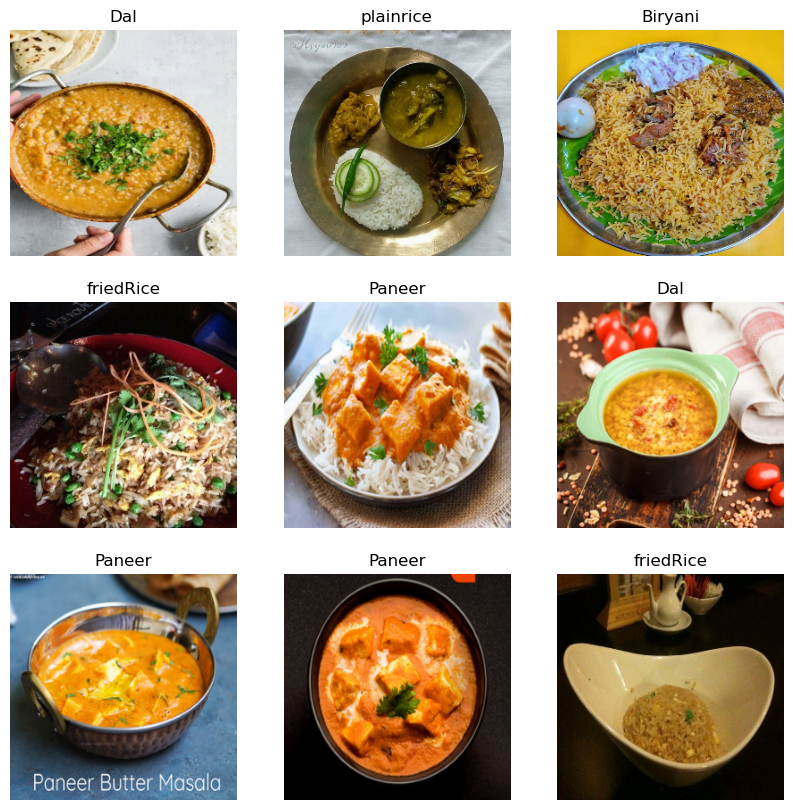

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [24]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 254, 254, 3)
(32,)


In [25]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [28]:
normalization_layer = layers.Rescaling(1./255)

In [31]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [37]:
# #augmentation
# data_augmentation = keras.Sequential(
#   [
#     layers.RandomFlip("horizontal",
#                       input_shape=(img_height,
#                                   img_width,
#                                   3)),
#     layers.RandomRotation(0.1),
#     layers.RandomZoom(0.1),
#   ]
# )

In [38]:
# #augmenattion
# plt.figure(figsize=(10, 10))
# for images, _ in train_ds.take(1):
#   for i in range(9):
#     augmented_images = data_augmentation(images)
#     ax = plt.subplot(3, 3, i + 1)
#     plt.imshow(augmented_images[0].numpy().astype("uint8"))
#     plt.axis("off")

In [39]:
num_classes = len(class_names)

input_shape = (img_height, img_width, 3)

# Load pre-trained ResNet101 model
base_model = ResNet101(weights='imagenet',include_top=False, input_shape=input_shape)

# Freeze the convolutional layers
for layer in base_model.layers:
    layer.trainable = False

# Create a sequential model by adding the ResNet50 base model and additional layers
model = tf.keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])






In [40]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [41]:
epochs=90
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/90
142/142 [==============================] - 1334s 9s/step - loss: 0.7929 - accuracy: 0.7533 - val_loss: 0.4148 - val_accuracy: 0.8765
Epoch 2/90
142/142 [==============================] - 1306s 9s/step - loss: 0.2870 - accuracy: 0.9110 - val_loss: 0.3837 - val_accuracy: 0.8695
Epoch 3/90
142/142 [==============================] - 1297s 9s/step - loss: 0.1803 - accuracy: 0.9424 - val_loss: 0.3305 - val_accuracy: 0.8924
Epoch 4/90
142/142 [==============================] - 1293s 9s/step - loss: 0.1113 - accuracy: 0.9692 - val_loss: 0.3210 - val_accuracy: 0.8977
Epoch 5/90
142/142 [==============================] - 930s 7s/step - loss: 0.0811 - accuracy: 0.9794 - val_loss: 0.3519 - val_accuracy: 0.8977
Epoch 6/90
142/142 [==============================] - 772s 5s/step - loss: 0.0464 - accuracy: 0.9900 - val_loss: 0.3212 - val_accuracy: 0.9092
Epoch 7/90
142/142 [==============================] - 776s 5s/step - loss: 0.0350 - accuracy: 0.9916 - val_loss: 0.3456 - val_accuracy: 0.

KeyboardInterrupt: 

In [51]:
import urllib
from skimage import io

1/1 [==============================] - 1s 510ms/step


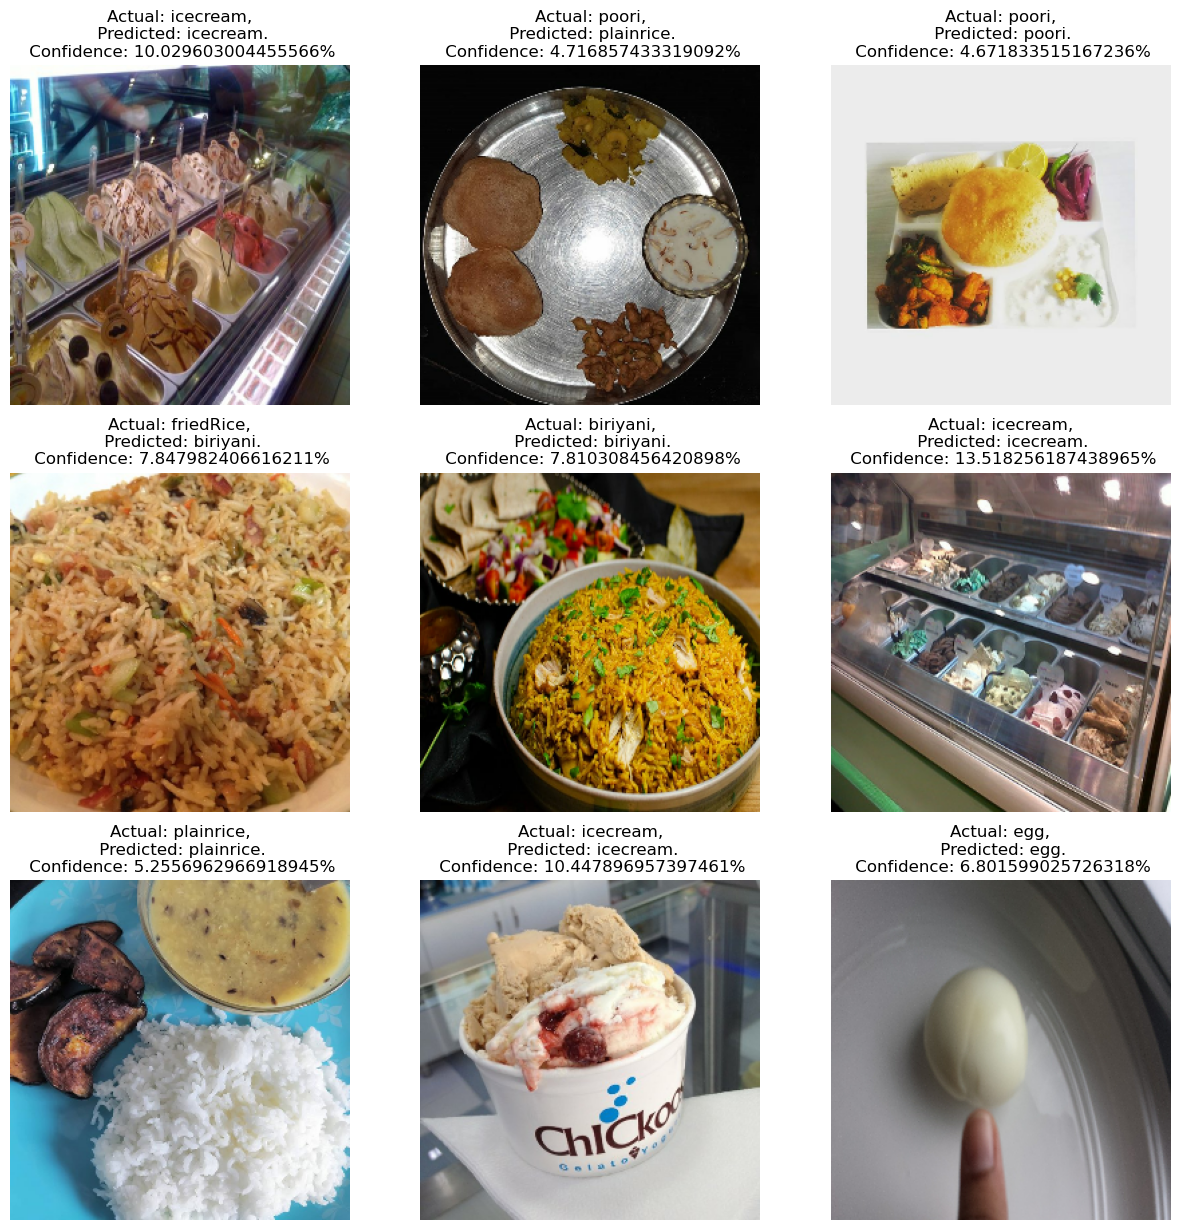

PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\chait\\AppData\\Local\\Temp\\tmpgecfp484'

In [54]:
# import matplotlib.pyplot as plt
# def predict(model, img):
#     img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
#     img_array = tf.expand_dims(img_array, 0)

#     predictions = model.predict(img_array)

#     predicted_class = class_names[np.argmax(predictions[0])]
#     confidence = round(100 * (np.max(predictions[0])), 2)
#     return predicted_class, confidence
# plt.figure(figsize=(15, 15))
# for images, labels in train_ds.take(1):
#     for i in range(9):
#         ax = plt.subplot(3, 3, i + 1)
#         plt.imshow(images[i].numpy().astype("uint8"))
        
#         predicted_class, confidence = predict(model, images[i].numpy())
#         con=(confidence/100)
#         actual_class = class_names[labels[i]] 
        
#         plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {con}%")
        
#         plt.axis("off")
import matplotlib.pyplot as plt

def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence =np.max(predictions[0])
    return predicted_class, confidence

plt.figure(figsize=(15, 15))

for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())

        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

plt.show()

In [45]:
# import requests
# import matplotlib.pyplot as plt
# from PIL import Image
# from io import BytesIO
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras.preprocessing.image import img_to_array, load_img

# sunflower_url = "https://th.bing.com/th?id=OIP.8MEFP-36nTK4NGuo6UAxKgHaF7&w=279&h=223&c=8&rs=1&qlt=90&o=6&dpr=1.3&pid=3.1&rm=2"
# sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

# img = tf.keras.utils.load_img(
#     sunflower_path, target_size=(img_height, img_width)
# )
# img_array = tf.keras.utils.img_to_array(img)
# img_array = tf.expand_dims(img_array, 0) # Create a batch

# predictions = model.predict(img_array)
# score = tf.nn.softmax(predictions[0])

# print(
#     "This image most likely belongs to {} with a {:.2f} percent confidence."
#     .format(class_names[np.argmax(score)], 100 * np.max(score))
# )
# # Function to preprocess the image
# def preprocess_image(image_path, target_size=(254, 254)):
#     img = load_img(image_path, target_size=target_size)
#     img_array = img_to_array(img)
#     img_array = np.expand_dims(img_array, axis=0)
#     img_array /= 255.0  # Normalize the pixel values to be between 0 and 1
#     return img_array

# # Function to make predictions using the model
# def predict_image(model, image_path):
#     img_array = preprocess_image(image_path)
#     predictions = model.predict(img_array)
#     print(predictions)
#     predicted_class = np.argmax(predictions[0])
#     confidence = np.max(predictions[0])
#     class_name = class_names[predicted_class]
#     return class_name, predicted_class, confidence

# # URL of the image you want to test
# image_url = 'https://th.bing.com/th?q=Apple+Food&w=120&h=120&c=1&rs=1&qlt=90&cb=1&dpr=1.3&pid=InlineBlock&mkt=en-IN&cc=IN&setlang=en&adlt=moderate&t=1&mw=247'
# # Download the image from the URL
# response = requests.get(image_url)
# img = Image.open(BytesIO(response.content))

# # Save the image to a local file
# #image_path = 'D:/testing/apple.jpeg'
# #img.save(image_path)

# # Load your trained model
# # Replace 'your_model.h5' with the actual filename of your trained model
# model = tf.keras.models.load_model('new.h5')
# image_path="D:/testing/datasset/daal/00000014_resized.png"
# plt.imshow(img)
# # Make predictions
# class_name,predicted_class, confidence = predict_image(model, image_path)
# print(image_path)
# # Print the results
# print(f'Predicted Class: {class_name}')
# print(f'Predicted Class: {predicted_class}')
# print(f'Confidence: {confidence}')


1/1 [==============================] - 1s 682ms/step
This image most likely belongs to gulab with a 71.03 percent confidence.
